# Jaccard and word2vec matrices

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (12,12)

## Dataset (629814 documents)

This is the path to th dataset.

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


## Jaccard similarity

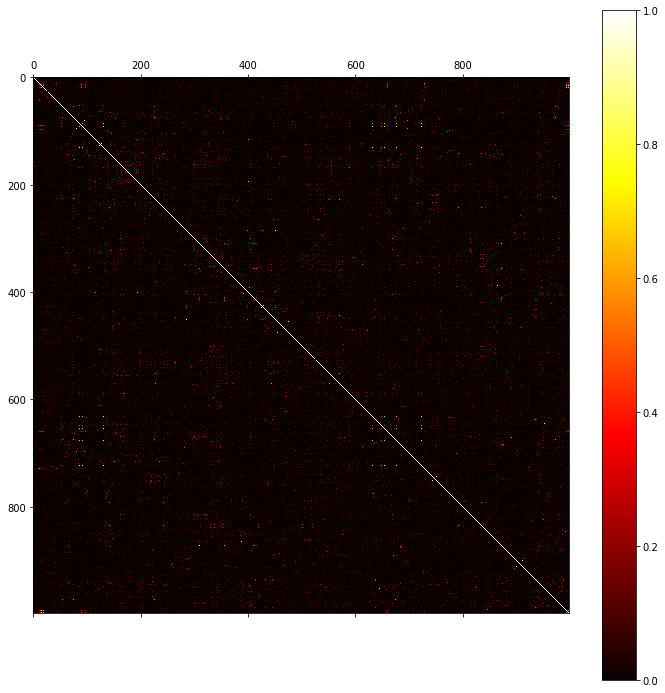

In [7]:
plt.matshow(matrix_jaccard, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## Dice from Jaccard

(998, 998)


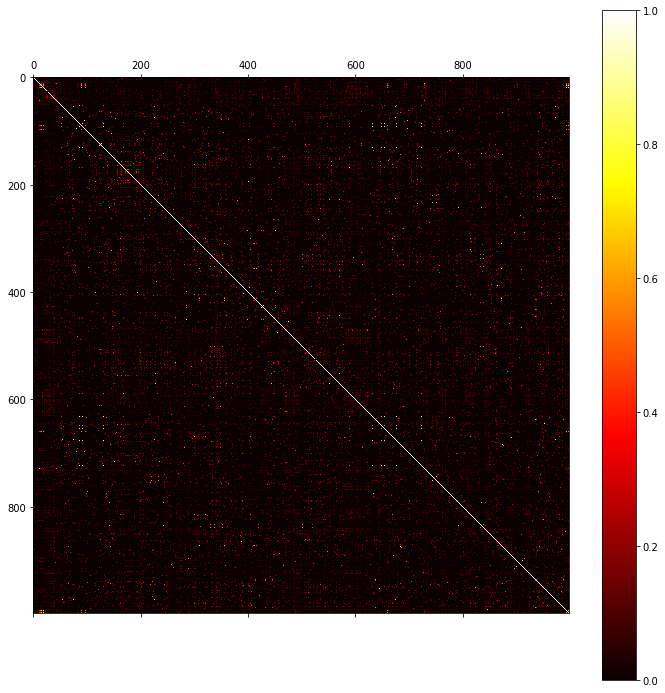

In [8]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

plt.matshow(matrix_dice, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## Jaccard disimilarity

(998, 998)


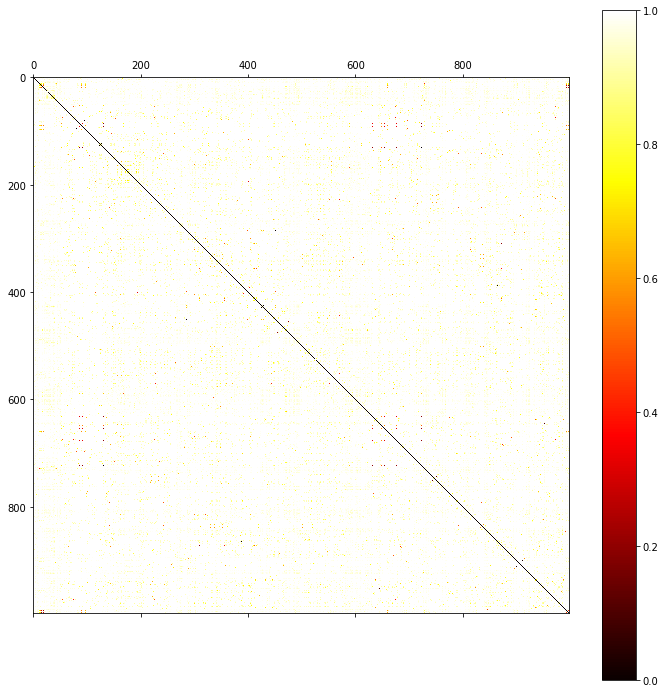

In [9]:
matrix_jaccard_dis = 1 -matrix_jaccard
print(matrix_jaccard_dis.shape)

plt.matshow(matrix_jaccard_dis, cmap='hot', vmin=0, vmax=1)
plt.colorbar()

## word2vec similarity.

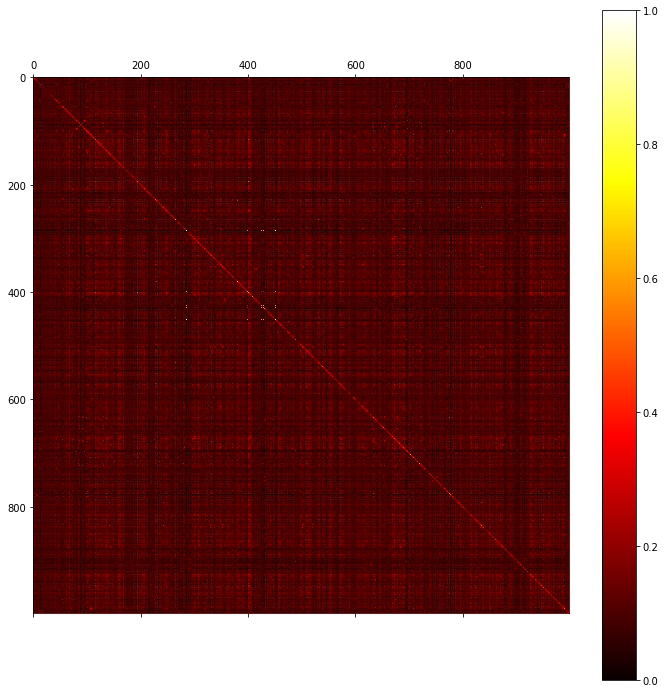

In [10]:
plt.matshow(matrix_word2vec, cmap='hot', vmin=0, vmax=1)
plt.colorbar()